<a href="https://colab.research.google.com/github/1306minyoung/data/blob/main/9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM과 GRU 셀

## LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 36s 96ms/step - loss: 0.6929 - accuracy: 0.5168 - val_loss: 0.6928 - val_accuracy: 0.5068
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 26s 82ms/step - loss: 0.6922 - accuracy: 0.5615 - val_loss: 0.6920 - val_accuracy: 0.5566
Epoch 3/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6910 - accuracy: 0.6016 - val_loss: 0.6905 - val_accuracy: 0.5954
Epoch 4/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6886 - accuracy: 0.6327 - val_loss: 0.6869 - val_accuracy: 0.6398
Epoch 5/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6794 - accuracy: 0.6701 - val_loss: 0.6670 - val_accuracy: 0.6850
Epoch 6/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6392 - accuracy: 0.6967 - val_loss: 0.6244 - val_accuracy: 0.6976
Epoch 7/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6078 - accuracy: 0.7153 - val_loss: 0.5995 - val_accuracy: 0.7176
Epoch 8/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5817 - accuracy: 0.7380 - val_loss: 0.5737 - val_accuracy: 0.74

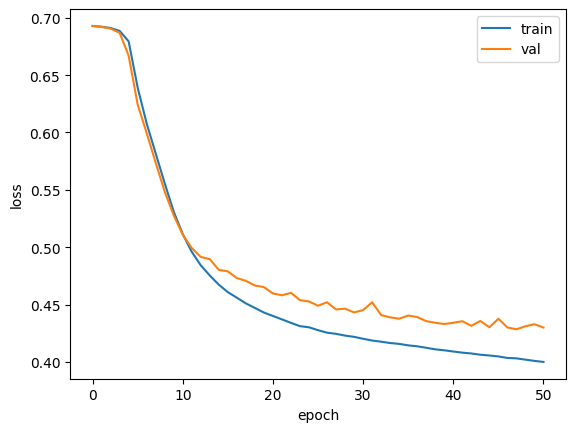

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##순환 층에 드롭아웃 적용하기

In [6]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 22s 60ms/step - loss: 0.6927 - accuracy: 0.5254 - val_loss: 0.6919 - val_accuracy: 0.5830
Epoch 2/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6908 - accuracy: 0.5849 - val_loss: 0.6893 - val_accuracy: 0.6296
Epoch 3/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6859 - accuracy: 0.6270 - val_loss: 0.6803 - val_accuracy: 0.6756
Epoch 4/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6591 - accuracy: 0.6917 - val_loss: 0.6287 - val_accuracy: 0.7042
Epoch 5/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6175 - accuracy: 0.7038 - val_loss: 0.6049 - val_accuracy: 0.7134
Epoch 6/100
313/313 [==============================] - 16s 50ms/step - loss: 0.5970 - accuracy: 0.7218 - val_loss: 0.5879 - val_accuracy: 0.7238
Epoch 7/100
313/313 [==============================] - 16s 50ms/step - loss: 0.5795 - accuracy: 0.7325 - val_loss: 0.5679 - val_ac

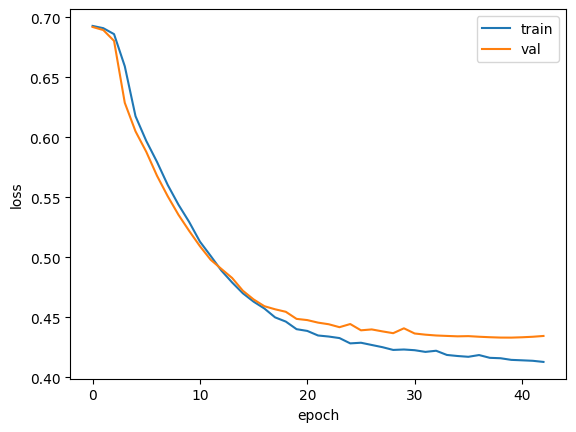

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##2개 층 연결하기

In [9]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 35s 99ms/step - loss: 0.6928 - accuracy: 0.5225 - val_loss: 0.6922 - val_accuracy: 0.5684
Epoch 2/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6906 - accuracy: 0.5780 - val_loss: 0.6879 - val_accuracy: 0.6156
Epoch 3/100
313/313 [==============================] - 30s 96ms/step - loss: 0.6747 - accuracy: 0.6449 - val_loss: 0.6475 - val_accuracy: 0.6580
Epoch 4/100
313/313 [==============================] - 29s 92ms/step - loss: 0.5951 - accuracy: 0.6972 - val_loss: 0.5570 - val_accuracy: 0.7256
Epoch 5/100
313/313 [==============================] - 29s 92ms/step - loss: 0.5451 - accuracy: 0.7302 - val_loss: 0.5274 - val_accuracy: 0.7460
Epoch 6/100
313/313 [==============================] - 29s 92ms/step - loss: 0.5140 - accuracy: 0.7548 - val_loss: 0.4971 - val_accuracy: 0.7602
Epoch 7/100
313/313 [==============================] - 29s 92ms/step - loss: 0.4970 - accuracy: 0.7631 - val_loss: 0.4820 - val_ac

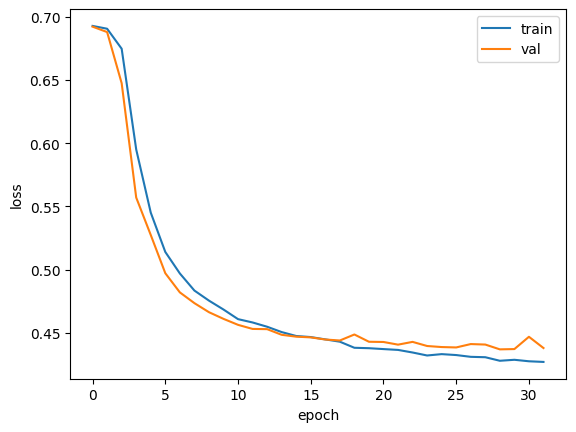

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##GRU 신경망 훈련하기

In [12]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 22s 58ms/step - loss: 0.6927 - accuracy: 0.5160 - val_loss: 0.6921 - val_accuracy: 0.5328
Epoch 2/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6912 - accuracy: 0.5544 - val_loss: 0.6904 - val_accuracy: 0.5564
Epoch 3/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6889 - accuracy: 0.5832 - val_loss: 0.6877 - val_accuracy: 0.5762
Epoch 4/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6851 - accuracy: 0.5985 - val_loss: 0.6830 - val_accuracy: 0.5970
Epoch 5/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6790 - accuracy: 0.6112 - val_loss: 0.6762 - val_accuracy: 0.6058
Epoch 6/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6696 - accuracy: 0.6283 - val_loss: 0.6652 - val_accuracy: 0.6258
Epoch 7/100
313/313 [==============================] - 17s 56ms/step - loss: 0.6554 - accuracy: 0.6432 - val_loss: 0.6488 - val_ac

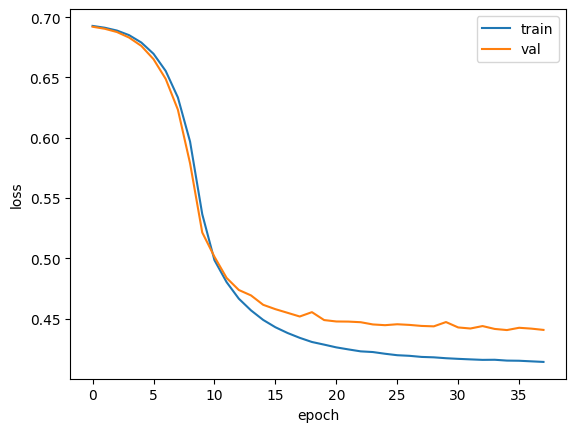

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 15s 17ms/step - loss: 0.4314 - accuracy: 0.7982


[0.4313967227935791, 0.7981600165367126]